In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori
import os

In [2]:
df = pd.read_csv('BreadBasket_DMS - Arindam Dev.csv')
print('Dataset Information: \n',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
Dataset Information: 
 None


In [3]:
print('First Ten Rows of the DataFrame: \n',df.head(10))

First Ten Rows of the DataFrame: 
          Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam
5  2016-10-30  10:07:57            3        Cookies
6  2016-10-30  10:08:41            4         Muffin
7  2016-10-30  10:13:03            5         Coffee
8  2016-10-30  10:13:03            5         Pastry
9  2016-10-30  10:13:03            5          Bread


In [4]:
print('Unique Items: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

Unique Items:  95

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry 

In [5]:
print(df.isnull().sum())

Date           0
Time           0
Transaction    0
Item           0
dtype: int64


In [6]:
print(df[df['Item']=='NONE'])

             Date      Time  Transaction  Item
26     2016-10-30  10:27:21           11  NONE
38     2016-10-30  10:34:36           15  NONE
39     2016-10-30  10:34:36           15  NONE
66     2016-10-30  11:05:30           29  NONE
80     2016-10-30  11:37:10           37  NONE
...           ...       ...          ...   ...
21108  2017-04-08  11:54:22         9590  NONE
21122  2017-04-08  12:58:25         9599  NONE
21254  2017-04-09  12:01:07         9666  NONE
21255  2017-04-09  12:04:13         9667  NONE
21266  2017-04-09  12:31:28         9672  NONE

[786 rows x 4 columns]


In [7]:
df.drop(df[df['Item']=='NONE'].index, inplace=True)
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [8]:
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])
df['Hour'] = df['Time'].apply(lambda x: x.split(":")[0])
df['Minute'] = df['Time'].apply(lambda x: x.split(":")[1])
df['Second'] = df['Time'].apply(lambda x: x.split(":")[2])
df.head()

,Date,Time,Transaction,Item,Year,Month,Day,Hour,Minute,Second
0,2016-10-30,09:58:11,1,Bread,2016,10,30,09,58,11
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,05,34
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,05,34
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30,10,07,57
4,2016-10-30,10:07:57,3,Jam,2016,10,30,10,07,57


In [9]:
df.describe()

,Transaction
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [10]:
most_sold = df['Item'].value_counts().head(15)
print('Most Sold Items: \n',most_sold)

Most Sold Items: 
 Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Name: Item, dtype: int64


Text(0.5, 1.0, 'Items Most Sold')

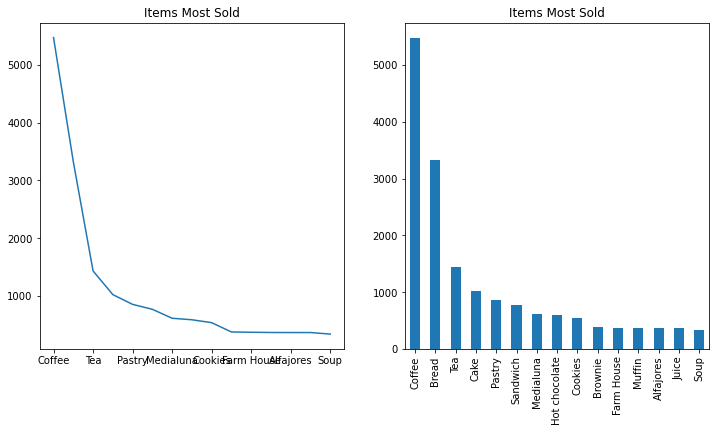

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
most_sold.plot(kind='line')
plt.title('Items Most Sold')
plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

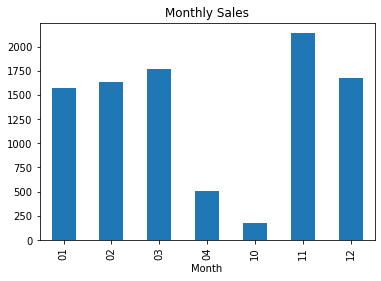

In [12]:
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

In [13]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


In [14]:
transaction_list = []
for i in df['Transaction'].unique():
    totallist = list(set(df[df['Transaction']==i]['Item']))
    if len(totallist)>0:
        transaction_list.append(totallist)
print(len(transaction_list))

9465


In [17]:
trans = TransactionEncoder()
trans_ary = trans.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(trans_ary, columns=trans.columns_)
df.head()

,Date,Time,Transaction,Item,Year,Month,Day,Hour,Minute,Second
0,2016-10-30,09:58:11,1,Bread,2016,10,30,09,58,11
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,05,34
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,05,34
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30,10,07,57
4,2016-10-30,10:07:57,3,Jam,2016,10,30,10,07,57


In [18]:
itemsets = apriori(df2, min_support=0.03, use_colnames=True)
rules = association_rules(itemsets, metric='lift', min_threshold=1.0)
rules.sort_values('confidence', ascending=False)

rules[ (rules['lift'] >= 5) &
       (rules['confidence'] >= 1) ]
print(rules)

   antecedents  consequents  antecedent support  consequent support   support  \
0       (Cake)     (Coffee)            0.103856            0.478394  0.054728   
1     (Coffee)       (Cake)            0.478394            0.103856  0.054728   
2  (Medialuna)     (Coffee)            0.061807            0.478394  0.035182   
3     (Coffee)  (Medialuna)            0.478394            0.061807  0.035182   
4     (Pastry)     (Coffee)            0.086107            0.478394  0.047544   
5     (Coffee)     (Pastry)            0.478394            0.086107  0.047544   
6   (Sandwich)     (Coffee)            0.071844            0.478394  0.038246   
7     (Coffee)   (Sandwich)            0.478394            0.071844  0.038246   

   confidence      lift  leverage  conviction  
0    0.526958  1.101515  0.005044    1.102664  
1    0.114399  1.101515  0.005044    1.011905  
2    0.569231  1.189878  0.005614    1.210871  
3    0.073542  1.189878  0.005614    1.012667  
4    0.552147  1.154168  0.006

In [19]:
print(rules['antecedents'][7])

frozenset({'Coffee'})
